# Ruijie_Rao_HW7_HMM

Consider a variable x with domain {1, 2, 3 ... 10}. Let vt be the value of x at timestep t. vt+1 is equal to vt
\- 1 or vt + 1 with probability 0.5 each, except when vt = 1 or vt = 10, in which case vt+1 = 2 or vt+1 = 9,
respectively. At each timestep t, we also get noisy measurements of vt. That is, vt -1, vt or vt + 1 can be
returned with equal probabilities. Your task is to use a Hidden Markov Model to figure out the most likely
sequence of values v1 v2 ... v10 when the observation sequence is 8, 6, 4, 6, 5, 4, 5, 5, 7, 9. At timestep t =
1, v1 can be any value in {1, 2, 3 ... 10} with equal prior probabilities.

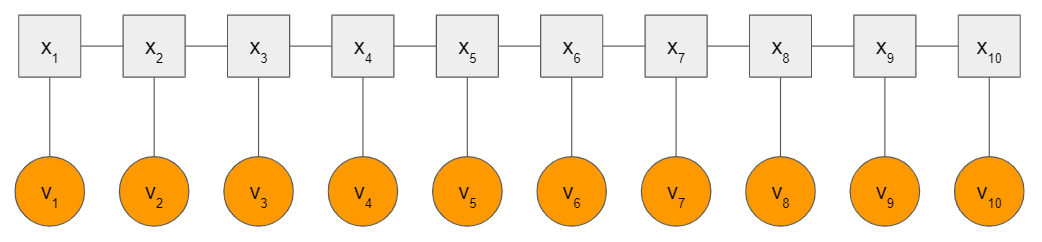

## Viterbi Algorithm

In [1]:
import numpy as np
import pandas as pd

Viterbi Algoritm is composed of 2 recursions. 

First recursion constructs 2 matrices in a forward direction. S records the previous state, in other words records the routes starting from all possible initiations. P records the possibilities of the most probable state. At the end of the recursion, P gathers all the probability information in the last column and ready to find the optimal solution.

Second recursion goes backward and simply follows the trail of S, starting from the last state that has the highest probability in P.

In [13]:
class Viterbi:
    def __init__(self,A,B,pi):
        self.A = A
        self.B = B
        self.pi = pi
    
    def fit(self,y):
        T = y.shape[0] # Number of total t
        N = self.A.shape[0] # Number of Possiblities
        P = np.zeros((T,N)) # Possibility Records
        P[0] = self.pi*self.B[:,y[0]] # Initiate with first overservation
        S = np.zeros((T - 1, N)) # State Records without initiation state
        
        for t in range(T-1):
            for i in range(N):
                p = P[t] + self.A[:,i] + self.B[i,y[t+1]] # calculation of possibility to all states at current time
                S[t,i] = np.argmax(p) # pick the most propable state
                P[t+1,i] = np.max(p) # record the best probibility

        result = []
        best_state = np.argmax(P[-1,:])
        result.append(best_state)
        for t in range(T-2,-1,-1):
            best_state = int(S[t,best_state])
            result.append(best_state)
        
        result = result[::-1]
        return result

In order to initiate the algorithm, 3 matrices needs to be inputted:
1. A is the *State Transition Matrix*. $a_ij$ records the probability of $x_i$ becomes $x_j$.
2. B is the *Emission Matrix*. $b_ij$ records the probability of $v_j$ is observed given $x_i$.
3. Pi is the *Initiation Probabilities* that records the probabilities of each initiating states.

In [16]:
y = np.array([8, 6, 4, 6, 5, 4, 5, 5, 7, 9])
pi = 1/np.linspace(1,10,10)

A = np.zeros((10,10),float)
for i in range(10):
    for j in range(10):
        if (i+1==j) or (i-1==j):
            A[i,j] = 0.5
A[0,1] = 1.
A[9,8] = 1.

B = np.zeros((10,10),float)
for i in range(10):
    for j in range(10):
        if (i+1==j) or (i-1==j) or (i==j):
            B[i,j] = 1/3

In [14]:
myviterbi = Viterbi(A,B,pi)

## Outcome

In [15]:
myviterbi.fit(y)

[7, 6, 5, 6, 5, 4, 5, 6, 7, 8]

## Data Structure

Transfer Matrix is a NxN matrix. It has its diagonal surrounded by 0.5, because $x_i$ can only transfer to +1 or -1 at the next $t$. An exception is for i=1 and i=10, where they only have one option with possibility 1.

In [17]:
A

array([[0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0.5],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. ]])

Emission Matrix is a NxN matrix. It has a 3 width diagonal filled with 1/3, because for every $x_i$, its observed $v_j$ can only be -1, +1 or 0 of its own value.

In [20]:
B

array([[0.33333333, 0.33333333, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.33333333, 0.33333333, 0.33333333, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.33333333, 0.33333333, 0.33333333, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.33333333, 0.33333333, 0.33333333,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.33333333, 0.33333333,
        0.33333333, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.33333333,
        0.33333333, 0.33333333, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.33333333, 0.33333333, 0.33333333, 0.        , 0.        ],
       [0.        , 0.        , 0.       

Initiating Possibilities are simpy 1/10.

In [21]:
pi

array([1.        , 0.5       , 0.33333333, 0.25      , 0.2       ,
       0.16666667, 0.14285714, 0.125     , 0.11111111, 0.1       ])

## Challenges and Optimizations

**Challenge**: I was very challenged on how to convert Value Elimination concept to codes at the beginning, until I searched for Viterbi Algorithm and found out that it has the same concept of aggregating information to its last node.

**Optimization**: Created a algorithm object and has made the process more efficient in implementation.